<a href="https://colab.research.google.com/github/entomolab/DevBug/blob/main/devbug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Costa Rica BIG DATA School**
December, 2022

# Carga de los objetos necesarios del model SIR

In [128]:
import numpy as np
import random


# Person Object AKA Joe
class Person(object):
    def __init__(self):
        self.status = "Susceptible"
        self.days_sick = 0
        self.sickness_rate = 10
        self.Interaction = []
        self.masked = False
        self.vaccine = 0
        
    def maskUp(self, wears_mask):
        if (wears_mask):
            self.set_sickness_rate(self.sickness_rate/2)
            self.masked = True
    
    def set_sickness_rate(self, new_rate):
        self.sickness_rate = new_rate

    def get_vaccine(self):
      return self.vaccine
    
    def infect(self, number_of_days_sick):
        self.status = "Infected"
        self.days_sick = number_of_days_sick
    
    def recover(self):
        self.status = "Recovered"
        self.days_sick = 0
    
    def update(self):
        if (self.status == "Susceptible"):
            self.roll_for_infection()
            
        elif (self.status == "Infected"):            
            self.days_sick = self.days_sick - 1
            if (self.days_sick <= 0):
                self.recover()

    def update_days_sick(self):
        if (self.status == "Infected"):            
            self.days_sick = self.days_sick - 1
            if (self.days_sick <= 0):
                self.recover()

    def vaccination(self):
      if self.vaccine < 4:
        self.vaccine += 1
        self.set_sickness_rate(self.sickness_rate -0.5)
           
    def roll_for_infection(self):
        is_sick = (random.randint(0, 101) < self.sickness_rate)
        if (is_sick):
            self.infect(4)

In [129]:
# Population Object
class Population:
    def __init__(self, number=100, interaction=10, percentage_masked=0):
        self.People = []
        self.number = number
        self.interaction = interaction
        self.percentage_masked = percentage_masked
        
        if (number < 100):
            self.number = 100
        
        if (interaction < 10):
            self.interaction = 10
        
        ##build our population
        patient_Zero = Person()
        patient_Zero.infect(5)
        
        self.People.append(patient_Zero)
        
        for i in range(0,number):
            p = Person()
            if (i < number*(self.percentage_masked/100.0) and self.percentage_masked>0):
                p.maskUp(True)
            self.People.append(p)
     
    def number_of_sick(self):
        sick_Count = 0
        for j in self.People:
            if (j.status == "Infected"):
              sick_Count = sick_Count + 1
                
        return sick_Count
    
    def number_of_recovered(self):
        recovered_Count = 0
        for j in self.People:
            if (j.status == "Recovered"):
                recovered_Count = recovered_Count + 1
        
        return recovered_Count
    
    def number_of_susceptible(self):
        susceptible_Count = 0
        for j in self.People:
            if (j.status == "Susceptible"):
                susceptible_Count = susceptible_Count + 1
                
        return susceptible_Count
    
    def number_masked(self):
        masked_Count = 0
        for j in self.People:
            if (j.masked):
                masked_Count = masked_Count + 1
        
        return masked_Count
    
    def number_masked_sick(self):
        masked_SickCount = 0
        for j in self.People:
            if (j.masked and j.status == "Infected"):
                masked_SickCount = masked_SickCount + 1
        
        return masked_SickCount

    def number_vac0(self):
        vac0_count = 0
        for i in self.People:
            if (i.get_vaccine() == 0):
                vac0_count += 1        
        return vac0_count

    def number_vac1(self):
        vac1_count = 0
        for i in self.People:
            if (i.get_vaccine() == 1):
                vac1_count += 1        
        return vac1_count

    def number_vac2(self):
        vac2_count = 0
        for i in self.People:
            if (i.get_vaccine() == 2):
                vac2_count += 1        
        return vac2_count

    def number_vac3(self):
        vac3_count = 0
        for i in self.People:
            if (i.get_vaccine() == 3):
                vac3_count += 1        
        return vac3_count

    def number_vac4(self):
        vac4_count = 0
        for i in self.People:
            if (i.get_vaccine() == 4):
                vac4_count += 1        
        return vac4_count

    def mass_vaccination(self, vaccination_campaign):
      amount_people = len(self.People) * 0.4
      for i in range(0, int(amount_people)):
        r = random.randint(0, len(self.People) - 1)
        if (self.People[r].get_vaccine() < vaccination_campaign):
            self.People[r].vaccination()
        else:
          i -= 1

    ## Here's the brains of the Population class (and our code)
    ## the update will be ran everyday (meaning, every iteration of our while loop)
    ## build interaction tables (who interacted with whom)
    ## if marked sick they must roll to see if (one per interaction)
    ## if I interacted with 10 people, each of them must roll and vice versa if they
    ## they were marked as infected
    def update(self):
        ## people who are might get sick
        might_Get_Sick = []
        
        for person in self.People:
            
            #clear out your interactions per day
            person.Interaction = []
            
            ##These are the n number of people that you interact with
            for i in range(0, self.interaction):
                r = random.randint(0,self.number)
                person.Interaction.append(r)
                
            ##if "person" is Infected, every single person they interacted with might get sick
            if (person.status == "Infected"):
                person.update_days_sick()
                
                for m in person.Interaction:
                    if (self.People[m].status == "Susceptible"): #only susceptible people can get sick
                        might_Get_Sick.append(self.People[m])
            
            ##if "person" is susceptible and they interact w/ someone who is "infected" 
            ##person gets added to the "might get sick"
            if (person.status == "Susceptible"):
                for m in person.Interaction:
                    if (self.People[m].status == "Infected"):
                        might_Get_Sick.append(person)
            
        ##Now! We're going to roll through our "Might Get Sick" and they each roll a die
        ##this is only a list of susceptible people
        for p in might_Get_Sick:
            p.roll_for_infection()

In [130]:
# Define the Community
# Population( size_of_population, number_of_interactions, percentage_wearing_masks)
myCommunity = Population(8000,10,50)
day = 0
my_plot = []
number_sick = myCommunity.number_of_sick()
vaccination_campaign = 1;

while (number_sick > 0):
    number_sick = myCommunity.number_of_sick()
    number_recovered = myCommunity.number_of_recovered()
    number_masked = myCommunity.number_masked()
    number_masked_sick = myCommunity.number_masked_sick()
    with_0_vaccine = myCommunity.number_vac0()
    with_1_vaccine = myCommunity.number_vac1()
    with_2_vaccine = myCommunity.number_vac2()
    with_3_vaccine = myCommunity.number_vac3()
    with_4_vaccine = myCommunity.number_vac4()    
    
    my_plot.append([day, number_sick, number_recovered])
    
    if (myCommunity.percentage_masked > 0):
        print ("day:", day, "Number of sick:", number_sick, "Hosptalized:", number_sick*(.04), "Sick Mask Wearers:", number_masked_sick, "Mask Wearers:", number_masked, "With 0 vaccine: ", with_0_vaccine, "With 1 vaccine: ", with_1_vaccine, "With 2 vaccine: ", with_2_vaccine, "With 3 vaccine: ", with_3_vaccine, "With 4 vaccine: ", with_4_vaccine)
    else:
        print ("day:", day, "Number of sick:", number_sick)        

    day = day + 1
    myCommunity.update()
      
    if((vaccination_campaign * 3) == day):
      myCommunity.mass_vaccination(vaccination_campaign)
      vaccination_campaign = vaccination_campaign + 1

print ("day:", day, "Number of sick:", myCommunity.number_of_sick())
print ("Number recovered:", myCommunity.number_of_recovered())
print ("Number susceptible:", myCommunity.number_of_susceptible())

day: 0 Number of sick: 1 Hosptalized: 0.04 Sick Mask Wearers: 0 Mask Wearers: 4000 With 0 vaccine:  8001 With 1 vaccine:  0 With 2 vaccine:  0 With 3 vaccine:  0 With 4 vaccine:  0
day: 1 Number of sick: 4 Hosptalized: 0.16 Sick Mask Wearers: 1 Mask Wearers: 4000 With 0 vaccine:  8001 With 1 vaccine:  0 With 2 vaccine:  0 With 3 vaccine:  0 With 4 vaccine:  0
day: 2 Number of sick: 11 Hosptalized: 0.44 Sick Mask Wearers: 4 Mask Wearers: 4000 With 0 vaccine:  8001 With 1 vaccine:  0 With 2 vaccine:  0 With 3 vaccine:  0 With 4 vaccine:  0
day: 3 Number of sick: 32 Hosptalized: 1.28 Sick Mask Wearers: 13 Mask Wearers: 4000 With 0 vaccine:  5355 With 1 vaccine:  2646 With 2 vaccine:  0 With 3 vaccine:  0 With 4 vaccine:  0
day: 4 Number of sick: 78 Hosptalized: 3.12 Sick Mask Wearers: 27 Mask Wearers: 4000 With 0 vaccine:  5355 With 1 vaccine:  2646 With 2 vaccine:  0 With 3 vaccine:  0 With 4 vaccine:  0
day: 5 Number of sick: 192 Hosptalized: 7.68 Sick Mask Wearers: 73 Mask Wearers: 400

In [131]:
def myCommunityTests(pop_test, interactions_test, masked_test):
    # Population( size_of_population, number_of_interactions, percentage_wearing_masks)
    myCommunity = Population(pop_test,interactions_test,masked_test)
    day = 0
    my_plot = []
    number_sick = myCommunity.number_of_sick()
    vaccination_campaign = 1;

    while (number_sick > 0):
        number_sick = myCommunity.number_of_sick()
        number_recovered = myCommunity.number_of_recovered()
        number_masked = myCommunity.number_masked()
        number_masked_sick = myCommunity.number_masked_sick()
        with_0_vaccine = myCommunity.number_vac0()
        with_1_vaccine = myCommunity.number_vac1()
        with_2_vaccine = myCommunity.number_vac2()
        with_3_vaccine = myCommunity.number_vac3()
        with_4_vaccine = myCommunity.number_vac4()    
    
        my_plot.append([day, number_sick, number_recovered, with_0_vaccine, with_1_vaccine, with_2_vaccine, with_3_vaccine, with_4_vaccine])
    
        if (myCommunity.percentage_masked > 0):
            print ("day:", day, "Number of sick:", number_sick, "Hosptalized:", number_sick*(.04), "Sick Mask Wearers:", number_masked_sick, "Mask Wearers:", number_masked, "With 0 vaccine: ", with_0_vaccine, "With 1 vaccine: ", with_1_vaccine, "With 2 vaccine: ", with_2_vaccine, "With 3 vaccine: ", with_3_vaccine, "With 4 vaccine: ", with_4_vaccine)
        else:
            print ("day:", day, "Number of sick:", number_sick)
    
        day = day + 1
        myCommunity.update()

        if((vaccination_campaign * 3) == day):
          myCommunity.mass_vaccination(vaccination_campaign)
          vaccination_campaign = vaccination_campaign + 1

    print ("day:", day, "Number of sick:", myCommunity.number_of_sick())
    print ("Number recovered:", myCommunity.number_of_recovered())
    print ("Number susceptible:", myCommunity.number_of_susceptible())

In [132]:
myCommunityTests(500, 3, 40)

day: 0 Number of sick: 1 Hosptalized: 0.04 Sick Mask Wearers: 0 Mask Wearers: 200 With 0 vaccine:  501 With 1 vaccine:  0 With 2 vaccine:  0 With 3 vaccine:  0 With 4 vaccine:  0
day: 1 Number of sick: 1 Hosptalized: 0.04 Sick Mask Wearers: 0 Mask Wearers: 200 With 0 vaccine:  501 With 1 vaccine:  0 With 2 vaccine:  0 With 3 vaccine:  0 With 4 vaccine:  0
day: 2 Number of sick: 2 Hosptalized: 0.08 Sick Mask Wearers: 0 Mask Wearers: 200 With 0 vaccine:  501 With 1 vaccine:  0 With 2 vaccine:  0 With 3 vaccine:  0 With 4 vaccine:  0
day: 3 Number of sick: 5 Hosptalized: 0.2 Sick Mask Wearers: 0 Mask Wearers: 200 With 0 vaccine:  340 With 1 vaccine:  161 With 2 vaccine:  0 With 3 vaccine:  0 With 4 vaccine:  0
day: 4 Number of sick: 14 Hosptalized: 0.56 Sick Mask Wearers: 0 Mask Wearers: 200 With 0 vaccine:  340 With 1 vaccine:  161 With 2 vaccine:  0 With 3 vaccine:  0 With 4 vaccine:  0
day: 5 Number of sick: 31 Hosptalized: 1.24 Sick Mask Wearers: 4 Mask Wearers: 200 With 0 vaccine:  3

In [133]:
# Alter the myCommunityTests function to ouput wanted data to a csv

#Ex: Population_Size, Number_Interactions, Percentage_Masked, Total_Days, Number_Recovered, Number_Suceptible, Max_Sick, Max_Hospitalized
import pandas as pd

def myCommunityTests_toDict(pop_test, interactions_test, masked_test, hospitalization_rate = .04):
    # Population( size_of_population, number_of_interactions, percentage_wearing_masks)
    myCommunity = Population(pop_test,interactions_test,masked_test)
    day = 0
    my_plot = []
    simulation_sumary = {
        "Population_Size" : pop_test,
        "Number_Interactions" : interactions_test,
        "Percentage_Masked" : masked_test,
        "Hospitalization_Rate" : hospitalization_rate
    }
    
    number_sick = myCommunity.number_of_sick()
    vaccination_campaign = 1;

    while (number_sick > 0):
        number_sick = myCommunity.number_of_sick()
        number_recovered = myCommunity.number_of_recovered()
        number_masked = myCommunity.number_masked()
        number_masked_sick = myCommunity.number_masked_sick()
        with_0_vaccine = myCommunity.number_vac0()
        with_1_vaccine = myCommunity.number_vac1()
        with_2_vaccine = myCommunity.number_vac2()
        with_3_vaccine = myCommunity.number_vac3()
        with_4_vaccine = myCommunity.number_vac4()    
    
        my_plot.append([day, number_sick, number_recovered, number_sick*(hospitalization_rate), number_masked_sick, number_masked, with_0_vaccine, with_1_vaccine, with_2_vaccine, with_3_vaccine, with_4_vaccine])
    
        #if (myCommunity.percentage_masked > 0):
            #print ("day:", day, "Number of sick:", number_sick, "Hosptalized:", number_sick*(.04), "Sick Mask Wearers:", number_masked_sick, "Mask Wearers:", number_masked, "With 0 vaccine: ", with_0_vaccine, "With 1 vaccine: ", with_1_vaccine, "With 2 vaccine: ", with_2_vaccine, "With 3 vaccine: ", with_3_vaccine, "With 4 vaccine: ", with_4_vaccine)
        #else:
            #print ("day:", day, "Number of sick:", number_sick)
    
        day = day + 1
        myCommunity.update()

        if((vaccination_campaign * 3) == day):
          myCommunity.mass_vaccination(vaccination_campaign)
          vaccination_campaign = vaccination_campaign + 1
    
    dataset = pd.DataFrame(my_plot, columns=['day','number_sick', 'number_recovered','hosptalized', 'sick_mask_wearers', 'mask_wearers', 'with_0_vaccine', 'with_1_vaccine', 'with_2_vaccine', 'with_3_vaccine', 'with_4_vaccine'])
    #print ("day:", day, "Number of sick:", myCommunity.number_of_sick())
    #print ("Number recovered:", myCommunity.number_of_recovered())
    simulation_sumary["recovered"] = myCommunity.number_of_recovered()
    #print ("Number susceptible:", myCommunity.number_of_susceptible())
    simulation_sumary["susceptible"] = myCommunity.number_of_susceptible()
    #print (dataset.head())
    simulation_sumary["total_days"] = dataset["day"].max()
    simulation_sumary["max_sick"] = dataset["number_sick"].max()
    simulation_sumary["max_hosptalized"] = dataset["hosptalized"].max()
    simulation_sumary["max_sick_mask_wearers"] = dataset["sick_mask_wearers"].max()
    simulation_sumary["total_mask_wearers"] = dataset["mask_wearers"].max()
    simulation_sumary["with_0_vaccine"] = dataset["with_0_vaccine"].count()
    simulation_sumary["with_1_vaccine"] = dataset["with_1_vaccine"].count()
    simulation_sumary["with_2_vaccine"] = dataset["with_2_vaccine"].count()
    simulation_sumary["with_3_vaccine"] = dataset["with_3_vaccine"].count()
    simulation_sumary["with_4_vaccine"] = dataset["with_4_vaccine"].count()#modificamos acá
    
    
    print(simulation_sumary)
    return simulation_sumary

In [134]:
myCommunityTests_toDict(5000, 5, 50)

{'Population_Size': 5000, 'Number_Interactions': 5, 'Percentage_Masked': 50, 'Hospitalization_Rate': 0.04, 'recovered': 4919, 'susceptible': 82, 'total_days': 24, 'max_sick': 3563, 'max_hosptalized': 142.52, 'max_sick_mask_wearers': 1746, 'total_mask_wearers': 2500, 'with_0_vaccine': 25, 'with_1_vaccine': 25, 'with_2_vaccine': 25, 'with_3_vaccine': 25, 'with_4_vaccine': 25}


{'Population_Size': 5000,
 'Number_Interactions': 5,
 'Percentage_Masked': 50,
 'Hospitalization_Rate': 0.04,
 'recovered': 4919,
 'susceptible': 82,
 'total_days': 24,
 'max_sick': 3563,
 'max_hosptalized': 142.52,
 'max_sick_mask_wearers': 1746,
 'total_mask_wearers': 2500,
 'with_0_vaccine': 25,
 'with_1_vaccine': 25,
 'with_2_vaccine': 25,
 'with_3_vaccine': 25,
 'with_4_vaccine': 25}

In [135]:
import csv

test_population = 3000
maximum_interactions = 10
maximum_mask_percentage = 20
hospital_rate = .4

# Name of the output csv file
filename = "mycsvfile0.csv"


for i in range(0, maximum_interactions, 1):
     for m in range(0, maximum_mask_percentage, 1):
        
          sim_data = myCommunityTests_toDict(test_population, i, m, hospital_rate)
          print(sim_data)
    
          if (i == 0 and m == 0):
             with open(filename, 'w') as f:  
                 w = csv.DictWriter(f, sim_data.keys())
                 w.writeheader()
          else:
              with open(filename, 'a') as f:  # You will need 'wb' mode in Python 2.x
                w = csv.DictWriter(f, sim_data.keys())
                w.writerow(sim_data)

{'Population_Size': 3000, 'Number_Interactions': 0, 'Percentage_Masked': 0, 'Hospitalization_Rate': 0.4, 'recovered': 3000, 'susceptible': 1, 'total_days': 18, 'max_sick': 2517, 'max_hosptalized': 1006.8000000000001, 'max_sick_mask_wearers': 0, 'total_mask_wearers': 0, 'with_0_vaccine': 19, 'with_1_vaccine': 19, 'with_2_vaccine': 19, 'with_3_vaccine': 19, 'with_4_vaccine': 19}
{'Population_Size': 3000, 'Number_Interactions': 0, 'Percentage_Masked': 0, 'Hospitalization_Rate': 0.4, 'recovered': 3000, 'susceptible': 1, 'total_days': 18, 'max_sick': 2517, 'max_hosptalized': 1006.8000000000001, 'max_sick_mask_wearers': 0, 'total_mask_wearers': 0, 'with_0_vaccine': 19, 'with_1_vaccine': 19, 'with_2_vaccine': 19, 'with_3_vaccine': 19, 'with_4_vaccine': 19}
{'Population_Size': 3000, 'Number_Interactions': 0, 'Percentage_Masked': 1, 'Hospitalization_Rate': 0.4, 'recovered': 3000, 'susceptible': 1, 'total_days': 18, 'max_sick': 2556, 'max_hosptalized': 1022.4000000000001, 'max_sick_mask_wearers'

In [136]:
from sklearn import linear_model

# import the dataset into a pandas DataFrame
import pandas as pd
import numpy as np

In [137]:
diseaseData = pd.read_csv("mycsvfile0.csv") 

In [138]:
# Create training and test datasets where train contains the variables and test the results
train_percentage = .4 #train based on 80% of the dataset

msk = np.random.rand(len(diseaseData)) < train_percentage
print(msk)
train = diseaseData[msk]
test = diseaseData[~msk]

print("Number of Training Samples:",len(train))
print("Number of Test Samples:",len(test))

# Create X and Y datasets for both train and test where 
# X contains the variables and Y the results

#variable to check against
#test_variable = "max_sick"
test_variable = "max_sick_mask_wearers"


train_X = train.drop(columns =[test_variable])
train_Y = train[test_variable]
test_X = test.drop(columns =[test_variable])
test_Y = test[test_variable]

[ True False False  True  True  True False  True  True  True False  True
  True  True  True False False False False False  True False False  True
 False  True False False False  True False False  True  True  True False
 False  True False False False  True  True False  True  True False False
 False False False  True  True False False  True  True  True  True  True
  True  True False  True False  True False False False  True  True False
 False False False  True False False False  True False False  True False
 False  True False False False  True False False  True  True False  True
  True False  True False False False False  True  True False  True False
  True  True False False False False False False  True  True False False
 False False False  True False False  True False False False  True False
 False False False  True False  True False False False False  True  True
 False  True  True False  True False False  True False False False  True
 False False False  True False  True False  True Fa

In [152]:
regr = linear_model.LinearRegression()

In [140]:
regr.fit(train_X, train_Y)

LinearRegression()

In [141]:
print(regr.coef_) 

[ 0.00000000e+00 -5.16248971e-01 -1.20891007e+02  7.08826085e+08
  4.37181986e+11  4.37181986e+11  4.05874316e+07  1.87983745e+11
 -4.69959362e+11  4.80762682e+00  3.01959204e+07  3.01959204e+07
  3.01959204e+07 -7.65368866e+07 -5.46383070e+07]


In [142]:
np.mean((regr.predict(test_X) - test_Y)**2)

42.8883547008547

In [143]:
regr.score(test_X, test_Y)

0.9975960385267401

# Graphical analysis

In [144]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Descripción de la base datos

In [151]:
diseaseData.describe()

,Population_Size,Number_Interactions,Percentage_Masked,Hospitalization_Rate,recovered,susceptible,total_days,max_sick,max_hosptalized,max_sick_mask_wearers,total_mask_wearers,with_0_vaccine,with_1_vaccine,with_2_vaccine,with_3_vaccine,with_4_vaccine
count,199.0,199.000000,199.000000,1.990000e+02,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,3000.0,4.522613,9.547739,4.000000e-01,2990.768844,10.231156,18.271357,2511.402010,1004.560804,218.517588,286.582915,19.271357,19.271357,19.271357,19.271357,19.271357
std,0.0,2.868893,5.755672,5.565115e-17,6.060039,6.060039,1.285794,54.259191,21.703676,129.889263,172.752617,1.285794,1.285794,1.285794,1.285794,1.285794
min,3000.0,0.000000,0.000000,4.000000e-01,2969.000000,1.000000,16.000000,2390.000000,956.000000,0.000000,0.000000,17.000000,17.000000,17.000000,17.000000,17.000000
25%,3000.0,2.000000,5.000000,4.000000e-01,2987.000000,5.000000,17.000000,2472.000000,988.800000,111.500000,150.000000,18.000000,18.000000,18.000000,18.000000,18.000000
50%,3000.0,5.000000,10.000000,4.000000e-01,2991.000000,10.000000,18.000000,2514.000000,1005.600000,220.000000,300.000000,19.000000,19.000000,19.000000,19.000000,19.000000
75%,3000.0,7.000000,14.500000,4.000000e-01,2996.000000,14.000000,19.000000,2551.500000,1020.600000,331.000000,435.500000,20.000000,20.000000,20.000000,20.000000,20.000000
max,3000.0,9.000000,19.000000,4.000000e-01,3000.000000,32.000000,24.000000,2627.000000,1050.800000,441.000000,570.000000,25.000000,25.000000,25.000000,25.000000,25.000000


In [ ]:
Graphical analysis of Vaccine application (count) vs max_hosptalized

Text(0.5, 1.0, '$Adjusted R^{2} = 43$')

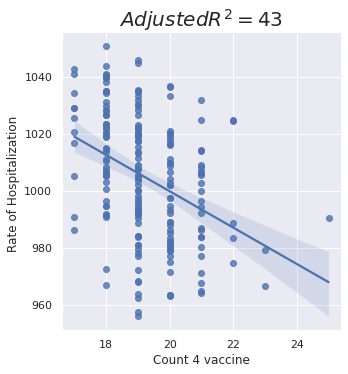

In [174]:
# 4 Vaccine application
g = sns.lmplot(x ='with_4_vaccine', y ='max_hosptalized', data = diseaseData)
plt.xlabel('Count 4 vaccine')
plt.ylabel('Rate of Hospitalization ')
plt.title(r'$Adjusted R^{2} = 43$', fontsize=20)



Mask Wearing vs Recovery_rate

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '$Adjusted R^{2} = 43$')

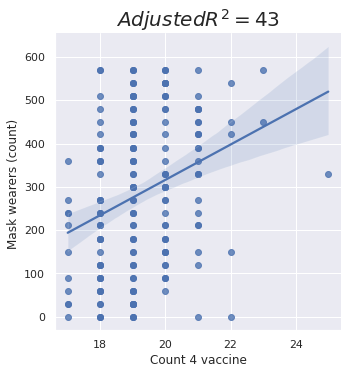

In [177]:
sns.lmplot('with_4_vaccine','total_mask_wearers', data = diseaseData)
plt.xlabel('Count 4 vaccine')
plt.ylabel('Mask wearers (count) ')
plt.title(r'$Adjusted R^{2} = 43$', fontsize=20)

# **THIS IS THE LAST FRONTIER IN A FAR FAR AWAY GALAXY

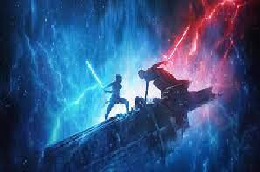**